# Computational Applications of the Pigeonhole Principle and Ramsey’s Theorem in Graph Theory
## By Moses A. Boudourides

### The Pigeonhole Principle

In [1]:
import random, string, math

def distr(items,containers):
    n=len(items)
    m=len(pigeonholes)
    holes=containers 
    if n>m:
        K=math.ceil((n-1)/m)
        for index, item in enumerate(items):
            holes[index % m].append(item)
        return holes
    else:
        for i in range(m):
            if i+1<=n:
                holes[i].append(items[i])
        return holes

In [2]:
n=18
m=10
print(math.floor((n-1)/m))
ab=list(string.ascii_lowercase)
pigeons=ab[:n]
pigeonholes=[[] for _ in range(m)]
print("Pigeons: %i\n%s" %(len(pigeons),pigeons))
print("Number of pigeonholes: %s" %m)
fp=distr(pigeons,pigeonholes)
print("Fair distribution of %i pigeons in %i pigeonholes:\n%s" %(n,m,fp))

1
Pigeons: 18
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r']
Number of pigeonholes: 10
Fair distribution of 18 pigeons in 10 pigeonholes:
[['a', 'k'], ['b', 'l'], ['c', 'm'], ['d', 'n'], ['e', 'o'], ['f', 'p'], ['g', 'q'], ['h', 'r'], ['i'], ['j']]


In [3]:
n=12
m=5
print(math.floor((n-1)/m))
ab=list(string.ascii_lowercase)
pigeons=ab[:n]
pigeonholes=[[] for _ in range(m)]
print("Pigeons: %i\n%s" %(len(pigeons),pigeons))
print("Number of pigeonholes: %s" %m)
fp=distr(pigeons,pigeonholes)
print("Fair distribution of %i pigeons in %i pigeonholes:\n%s" %(n,m,fp))

2
Pigeons: 12
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
Number of pigeonholes: 5
Fair distribution of 12 pigeons in 5 pigeonholes:
[['a', 'f', 'k'], ['b', 'g', 'l'], ['c', 'h'], ['d', 'i'], ['e', 'j']]


In [4]:
n=3
m=6
print(math.floor((n-1)/m))
ab=list(string.ascii_lowercase)
pigeons=ab[:n]
pigeonholes=[[] for _ in range(m)]
print("Pigeons: %i\n%s" %(len(pigeons),pigeons))
print("Number of pigeonholes: %s" %m)
fp=distr(pigeons,pigeonholes)
print("Fair distribution of %i pigeons in %i pigeonholes:\n%s" %(n,m,fp))

0
Pigeons: 3
['a', 'b', 'c']
Number of pigeonholes: 6
Fair distribution of 3 pigeons in 6 pigeonholes:
[['a'], ['b'], ['c'], [], [], []]


### Graphs

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph

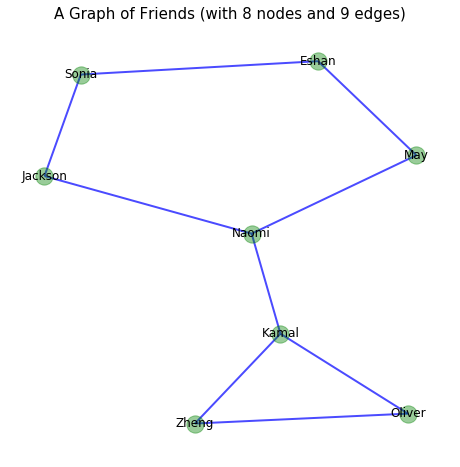

In [6]:
list_of_edges=[("Sonia","Eshan"),("Sonia","Jackson"),
               ("Eshan","May"),
               ("May","Naomi"),
               ("Jackson","Naomi"),
               ("Naomi","Kamal"),
               ("Kamal","Zheng"),("Kamal","Oliver"),
               ("Zheng","Oliver")]
G0 = nx.Graph() # an empty (undirected) graph
G0.add_edges_from(list_of_edges)

name = "A Graph of Friends"
pos=graphviz_layout(G0)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G0, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G0, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G0, pos)
plt.axis('off');
E=G0.edges()
sst=name+" (with %i nodes and %i edges)" %(len(G0.nodes()),len(E))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)

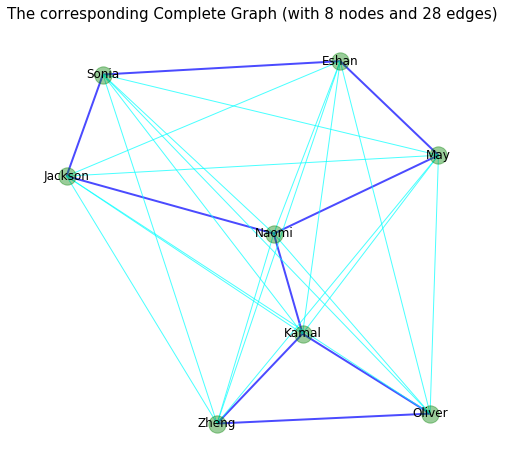

In [7]:
G=G0.copy()
for u in G.nodes():
    for v in G.nodes():
        if (u,v) not in G.edges():
            G.add_edge(*(u,v))
nz=list(zip(G.nodes(),G.nodes()))
G.remove_edges_from(nz)

name = "The corresponding Complete Graph"
pos=pos
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=E,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_edges(G, pos,edgelist=[e for e in G.edges() if e not in E],edge_color="cyan", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
sst=name+" (with %i nodes and %i edges)" %(len(G.nodes()),len(G.edges()))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)

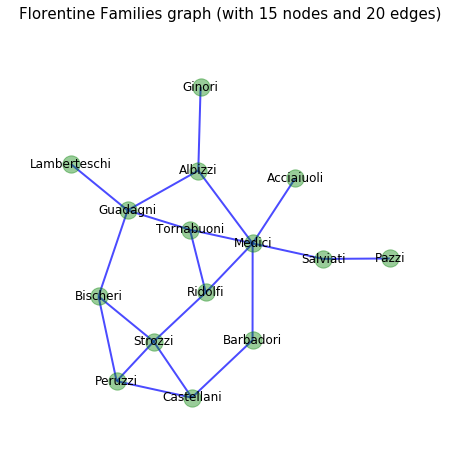

In [8]:
G = nx.florentine_families_graph()
name = "Florentine Families graph"
# G = nx.karate_club_graph()
# name = "Karate Club graph"

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
E=G.edges()
sst=name+" (with %i nodes and %i edges)" %(len(G.nodes()),len(E))
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.2)

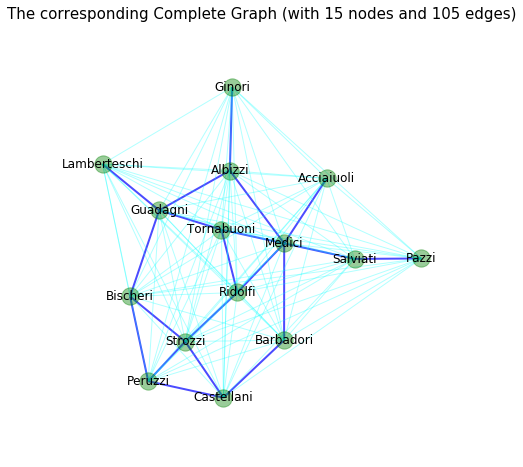

In [9]:
G=G.copy()
for u in G.nodes():
    for v in G.nodes():
        if (u,v) not in G.edges():
            G.add_edge(*(u,v))
nz=list(zip(G.nodes(),G.nodes()))
G.remove_edges_from(nz)

name = "The corresponding Complete Graph"
pos=pos
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=E,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_edges(G, pos,edgelist=[e for e in G.edges() if e not in E],edge_color="cyan", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
sst=name+" (with %i nodes and %i edges)" %(len(G.nodes()),len(G.edges()))
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.2)

### Degrees and Adjacency Matrices

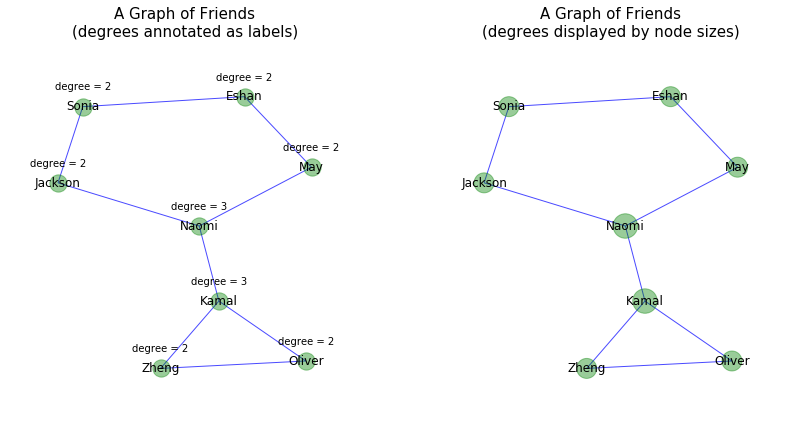

In [10]:
G=G0
name = "A Graph of Friends"
nx.set_node_attributes(G, dict(G.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name1=name+"\n(degrees annotated as labels)"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name1,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name2=name+"\n(degrees displayed by node sizes)"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.degree).values()], node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name2,fontsize=15);
        plt.margins(x=0.2, y=0.2)

[[0 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 0 1 1 0 1 0 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]]


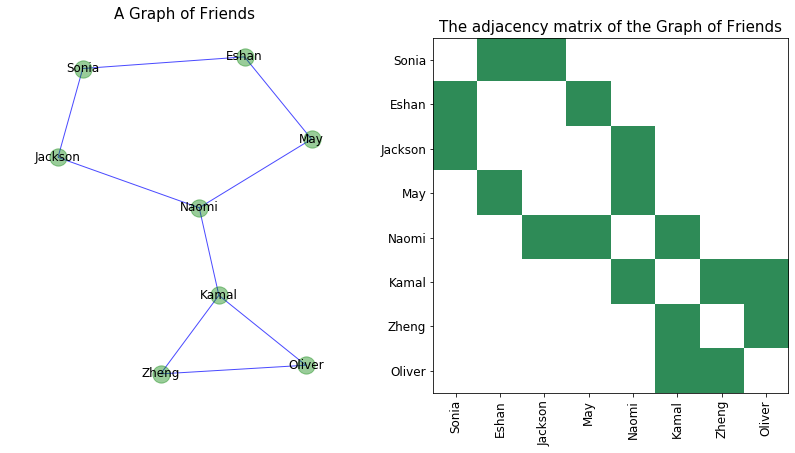

In [11]:
A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
x = list(G.nodes())
y = list(G.nodes())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.subplot(122)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=12, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=12);
plt.title("The adjacency matrix of the "+name.replace("A ",""),fontsize=15);

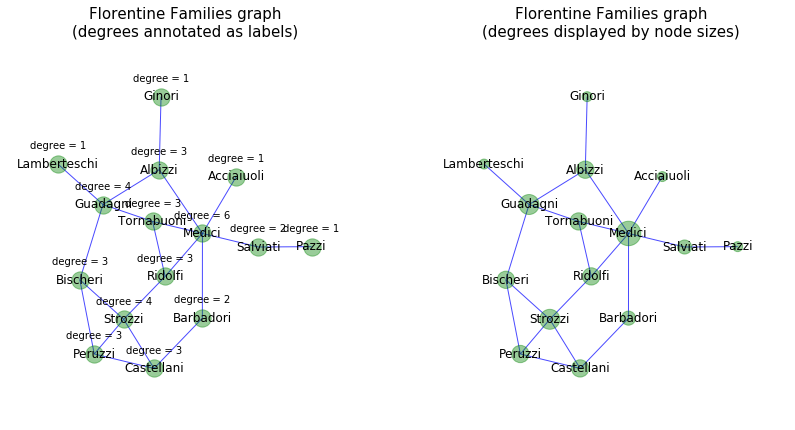

In [12]:
G = nx.florentine_families_graph()
name = "Florentine Families graph"
# G = nx.karate_club_graph()
# name = "Karate Club graph"
nx.set_node_attributes(G, dict(G.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name1=name+"\n(degrees annotated as labels)"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name1,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name2=name+"\n(degrees displayed by node sizes)"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*100 for v in dict(G.degree).values()], node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name2,fontsize=15);
        plt.margins(x=0.2, y=0.2)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


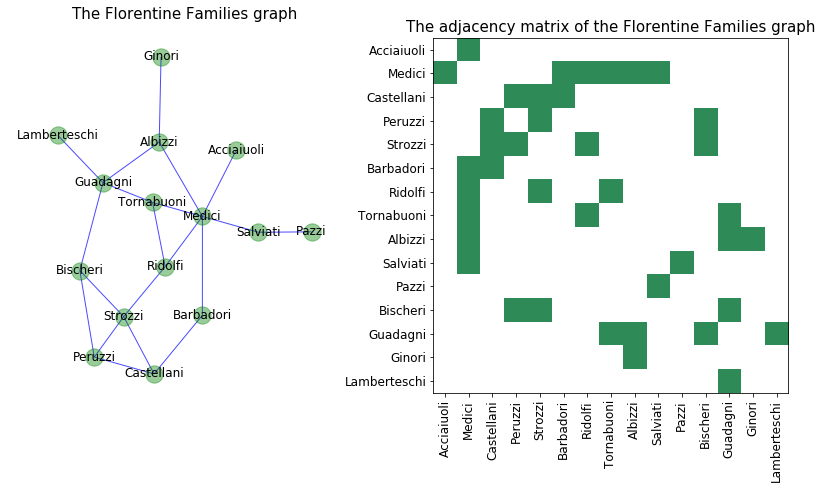

In [13]:
A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
x = list(G.nodes())
y = list(G.nodes())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name,fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=12, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=12);
plt.title("The adjacency matrix of the "+name,fontsize=15);

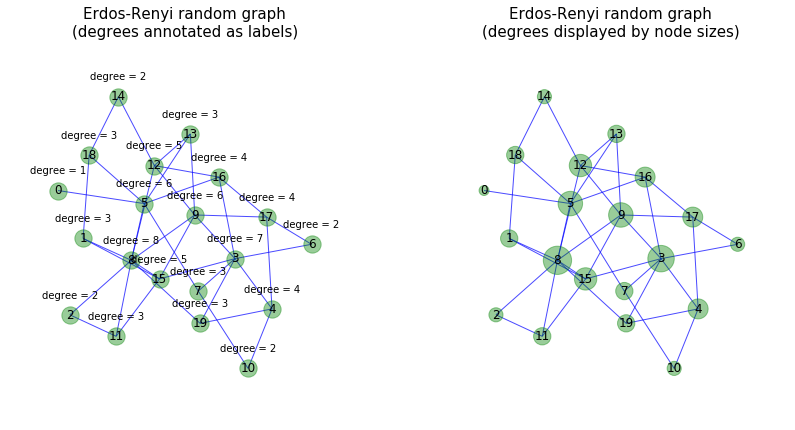

In [14]:
G1 = nx.erdos_renyi_graph(20,0.2)
name = "Erdos-Renyi random graph"
nx.set_node_attributes(G1, dict(G1.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name1=name+"\n(degrees annotated as labels)"
        pos=graphviz_layout(G1)
        nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G1, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G1, pos)
        node_attrs = nx.get_node_attributes(G1, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G1, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name1,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name2=name+"\n(degrees displayed by node sizes)"
        pos=graphviz_layout(G1)
        nodes = nx.draw_networkx_nodes(G1, pos,node_size=[v*100 for v in dict(G1.degree).values()], node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G1, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G1, pos)
        plt.axis('off');
        plt.title(name2,fontsize=15);
        plt.margins(x=0.2, y=0.2)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


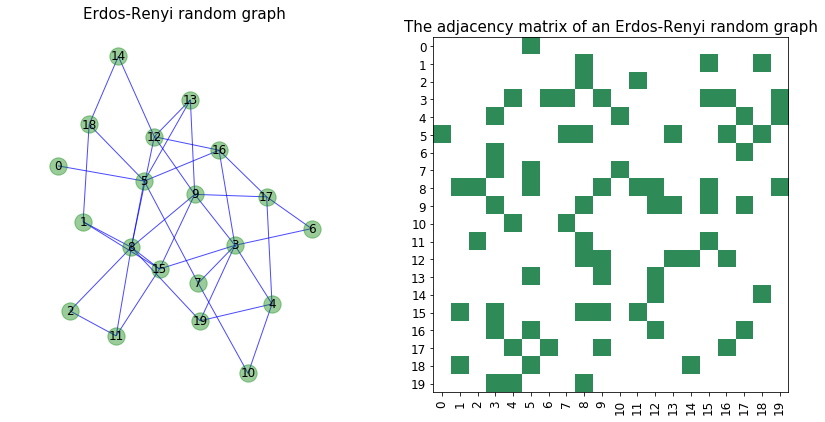

In [15]:
G=G1.copy()
A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
x = list(G.nodes())
y = list(G.nodes())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=12, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=12);
plt.title("The adjacency matrix of an "+name,fontsize=15);

### Handshaking

In [16]:
from collections import Counter

def samedegree(G):
    ds=sorted([d for v, d in G.degree()])
    N=[]
    for k,v in Counter(ds).items():
        if v>1:
            N.append(k)
    M=[n for n in G.nodes() if G.degree(n) in N]
    Md={k:G.degree(k) for k in M}
    vals=sorted(set(Md.values()))
    VG=[]
    for val in vals:
        t=[]
        for k,v in Md.items():
            if v==val:
                t.append(k)
        VG.append(t)
    return VG

In [17]:
G=G0.copy()
ds=sorted([d for v, d in G.degree()])
print(ds)
N=[]
for k,v in Counter(ds).items():
    if v>1:
        N.append(k)
M=[n for n in G.nodes() if G.degree(n) in N]
VG=samedegree(G)
print(len(VG))

[2, 2, 2, 2, 2, 2, 3, 3]
2


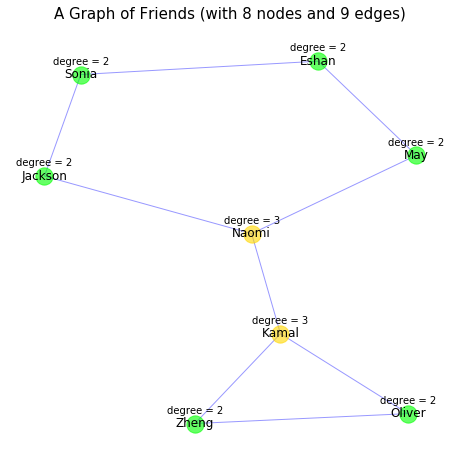

In [18]:
name = "A Graph of Friends"
nx.set_node_attributes(G, dict(G.degree), 'degree')
pos=graphviz_layout(G)
plt.figure(figsize=(8,8));

nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[0],node_color="lime", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[1],node_color="gold", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n not in [item for sublist in VG for item in sublist]],node_color="g", alpha=0.4)

nx.draw_networkx_edges(G, pos,width=1,edge_color="b", alpha=0.4)
nx.draw_networkx_labels(G, pos)
node_attrs = nx.get_node_attributes(G, 'degree')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    if node in M:
        att="degree = %i" %attr
    else:
        att=""
    custom_node_attrs[node] = att 
pos_attrs = {}
for node, coords in pos.items():
    if node in M:
        pos_attrs[node] = (coords[0], coords[1] + 10)
    else:
        pos_attrs[node] = (coords[0], coords[1])
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
plt.axis('off');
E=G.edges()
sst=name+" (with %i nodes and %i edges)" %(len(G.nodes()),len(E))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)

In [19]:
G = nx.florentine_families_graph()
name = "Florentine Families graph"
# G = nx.karate_club_graph()
# name = "Karate Club graph"
ds=sorted([d for v, d in G.degree()])
print(ds)
N=[]
for k,v in Counter(ds).items():
    if v>1:
        N.append(k)
M=[n for n in G.nodes() if G.degree(n) in N]
VG=samedegree(G)
print(len(VG))

[1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 6]
4


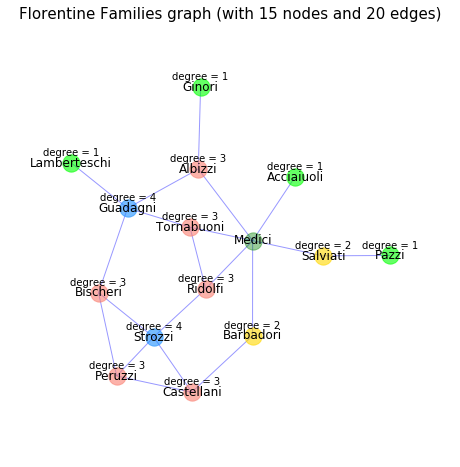

In [20]:
nx.set_node_attributes(G, dict(G.degree), 'degree')
pos=graphviz_layout(G)
plt.figure(figsize=(8,8));

nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[0],node_color="lime", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[1],node_color="gold", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[2],node_color="salmon", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[3],node_color="dodgerblue", alpha=0.6)
# nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[4],node_color="violet", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n not in [item for sublist in VG for item in sublist]],node_color="g", alpha=0.4)

nx.draw_networkx_edges(G, pos,width=1,edge_color="b", alpha=0.4)
nx.draw_networkx_labels(G, pos)
node_attrs = nx.get_node_attributes(G, 'degree')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    if node in M:
        att="degree = %i" %attr
    else:
        att=""
    custom_node_attrs[node] = att 
pos_attrs = {}
for node, coords in pos.items():
    if node in M:
        pos_attrs[node] = (coords[0], coords[1] + 10)
    else:
        pos_attrs[node] = (coords[0], coords[1])
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
plt.axis('off');
E=G.edges()
sst=name+" (with %i nodes and %i edges)" %(len(G.nodes()),len(E))
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.2)

In [21]:
G=G1.copy()
ds=sorted([d for v, d in G.degree()])
print(ds)
N=[]
for k,v in Counter(ds).items():
    if v>1:
        N.append(k)
M=[n for n in G.nodes() if G.degree(n) in N]
VG=samedegree(G)
print(len(VG))

[1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 8]
5


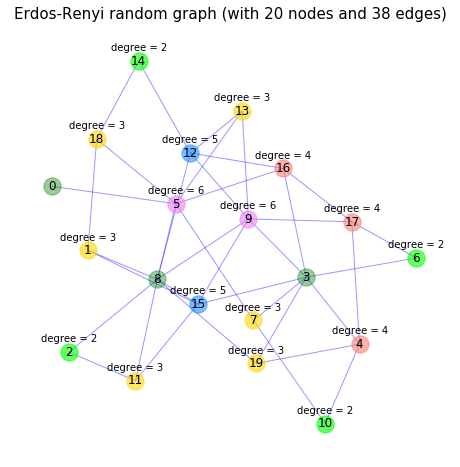

In [22]:
name = "Erdos-Renyi random graph"

nx.set_node_attributes(G, dict(G.degree), 'degree')
pos=graphviz_layout(G)
plt.figure(figsize=(8,8));

nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[0],node_color="lime", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[1],node_color="gold", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[2],node_color="salmon", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[3],node_color="dodgerblue", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=VG[4],node_color="violet", alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n not in [item for sublist in VG for item in sublist]],node_color="g", alpha=0.4)

nx.draw_networkx_edges(G, pos,width=1,edge_color="b", alpha=0.4)
nx.draw_networkx_labels(G, pos)
node_attrs = nx.get_node_attributes(G, 'degree')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    if node in M:
        att="degree = %i" %attr
    else:
        att=""
    custom_node_attrs[node] = att 
pos_attrs = {}
for node, coords in pos.items():
    if node in M:
        pos_attrs[node] = (coords[0], coords[1] + 10)
    else:
        pos_attrs[node] = (coords[0], coords[1])
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
plt.axis('off');
E=G.edges()
sst=name+" (with %i nodes and %i edges)" %(len(G.nodes()),len(E))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)

### Ramsey's Theorem for Cliques and Independent Sets

In [23]:
from networkx.algorithms.approximation.ramsey import ramsey_R2 

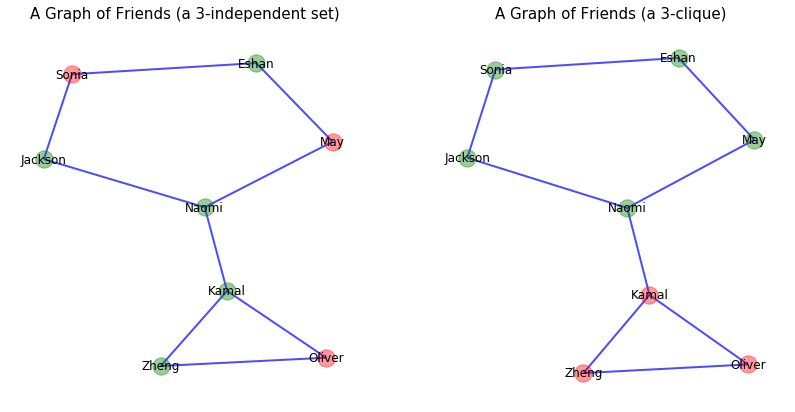

In [24]:
R2=ramsey_R2(G0)
indepe=list(R2[1])
clique=list(R2[0])

name = "A Graph of Friends"
pos=graphviz_layout(G0)
plt.figure(figsize=(14,7))
plt.subplot(121)
nodes = nx.draw_networkx_nodes(G0, pos,nodelist=indepe, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G0, pos,nodelist=[n for n in G0.nodes() if n not in indepe], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G0, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G0, pos)
plt.axis('off');
E=G0.edges()
sst=name+" (a %i-independent set)" %(len(indepe))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)
plt.subplot(122)
nodes = nx.draw_networkx_nodes(G0, pos,nodelist=clique, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G0, pos,nodelist=[n for n in G0.nodes() if n not in clique], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G0, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G0, pos)
plt.axis('off');
E=G0.edges()
sst=name+" (a %i-clique)" %(len(clique))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)

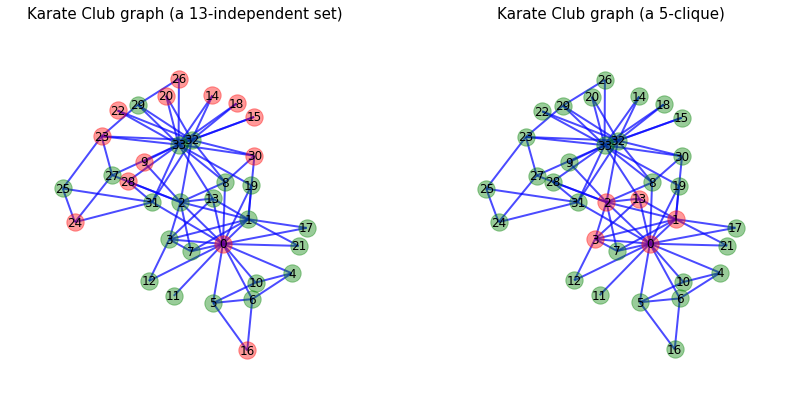

In [25]:
G = nx.florentine_families_graph()
name = "Florentine Families graph"
G = nx.karate_club_graph()
name = "Karate Club graph"
R2=ramsey_R2(G)
indepe=list(R2[1])
clique=list(R2[0])

pos=graphviz_layout(G)
plt.figure(figsize=(14,7))
plt.subplot(121)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=indepe, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=[n for n in G.nodes() if n not in indepe], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
E=G.edges()
sst=name+" (a %i-independent set)" %(len(indepe))
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.2)
plt.subplot(122)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=clique, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=[n for n in G.nodes() if n not in clique], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
E=G.edges()
sst=name+" (a %i-clique)" %(len(clique))
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.2)

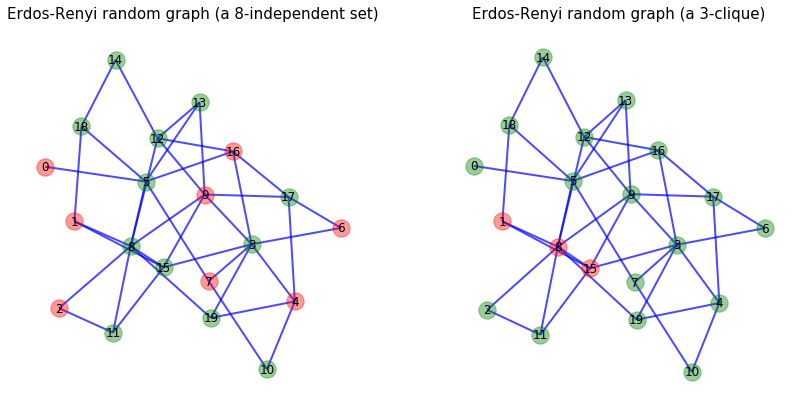

In [26]:
R2=ramsey_R2(G1)
indepe=list(R2[1])
clique=list(R2[0])

name = "Erdos-Renyi random graph"
pos=graphviz_layout(G1)
plt.figure(figsize=(14,7))
plt.subplot(121)
nodes = nx.draw_networkx_nodes(G1, pos,nodelist=indepe, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G1, pos,nodelist=[n for n in G1.nodes() if n not in indepe], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G1, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G1, pos)
plt.axis('off');
E=G1.edges()
sst=name+" (a %i-independent set)" %(len(indepe))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)
plt.subplot(122)
nodes = nx.draw_networkx_nodes(G1, pos,nodelist=clique, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G1, pos,nodelist=[n for n in G1.nodes() if n not in clique], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G1, pos,width=2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G1, pos)
plt.axis('off');
E=G1.edges()
sst=name+" (a %i-clique)" %(len(clique))
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1)